In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [53]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

print("Feature names:", iris.feature_names)
print("Target classes:", iris.target_names)
print("Shape of X:", X.shape, "Shape of y:", y.shape)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']
Shape of X: (150, 4) Shape of y: (150,)


In [55]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print("\nFirst 5 rows of dataset:")
print(df.head())


First 5 rows of dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# --- Multinomial Logistic Regression ---
clf_multinomial = LogisticRegression(solver="lbfgs", max_iter=1000)
clf_multinomial.fit(X_train_scaled, y_train)

# --- One-vs-Rest Logistic Regression ---
clf_ovr = OneVsRestClassifier(
    LogisticRegression(solver="lbfgs", max_iter=1000)
)
clf_ovr.fit(X_train_scaled, y_train)


OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [63]:
y_pred_multinomial = clf_multinomial.predict(X_test_scaled)
y_pred_ovr = clf_ovr.predict(X_test_scaled)

In [65]:
results_multinomial = pd.DataFrame({
    "Actual": [target_names[i] for i in y_test],
    "Predicted": [target_names[i] for i in y_pred_multinomial]
})
print("\n--- Actual vs Predicted (Multinomial) ---")
print(results_multinomial.head(15)) 

results_ovr = pd.DataFrame({
    "Actual": [target_names[i] for i in y_test],
    "Predicted": [target_names[i] for i in y_pred_ovr]
})
print("\n--- Actual vs Predicted (OvR) ---")
print(results_ovr.head(15))


--- Actual vs Predicted (Multinomial) ---
        Actual   Predicted
0    virginica   virginica
1   versicolor  versicolor
2    virginica  versicolor
3   versicolor  versicolor
4    virginica   virginica
5    virginica   virginica
6   versicolor  versicolor
7   versicolor  versicolor
8       setosa      setosa
9    virginica   virginica
10      setosa      setosa
11      setosa      setosa
12   virginica   virginica
13   virginica   virginica
14      setosa      setosa

--- Actual vs Predicted (OvR) ---
        Actual   Predicted
0    virginica   virginica
1   versicolor  versicolor
2    virginica  versicolor
3   versicolor   virginica
4    virginica   virginica
5    virginica   virginica
6   versicolor  versicolor
7   versicolor  versicolor
8       setosa      setosa
9    virginica   virginica
10      setosa      setosa
11      setosa      setosa
12   virginica   virginica
13   virginica   virginica
14      setosa      setosa


In [67]:
print("\n Multinomial Regression ")
print("Accuracy:", accuracy_score(y_test, y_pred_multinomial))
print(classification_report(y_test, y_pred_multinomial, target_names=target_names))

print("\n One-vs-Rest Regression ")
print("Accuracy:", accuracy_score(y_test, y_pred_ovr))
print(classification_report(y_test, y_pred_ovr, target_names=target_names))



 Multinomial Regression 
Accuracy: 0.9111111111111111
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


 One-vs-Rest Regression 
Accuracy: 0.8444444444444444
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      0.73      0.76        15
   virginica       0.75      0.80      0.77        15

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.85      0.84      0.84        45



In [69]:
cm_multinomial = confusion_matrix(y_test, y_pred_multinomial)
cm_ovr = confusion_matrix(y_test, y_pred_ovr)

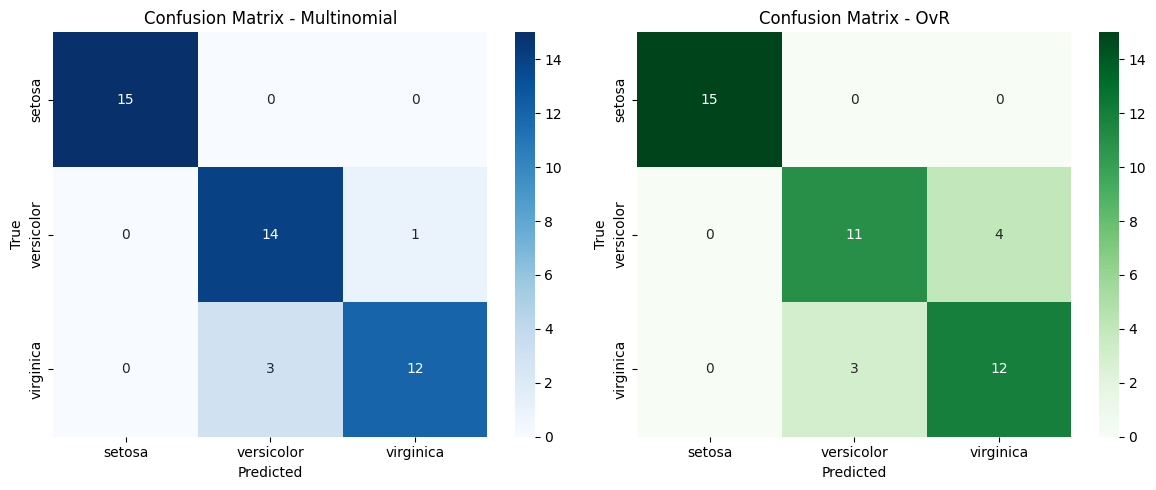

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_multinomial, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names, ax=axes[0])
axes[0].set_title("Confusion Matrix - Multinomial")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(cm_ovr, annot=True, fmt="d", cmap="Greens",
            xticklabels=target_names, yticklabels=target_names, ax=axes[1])
axes[1].set_title("Confusion Matrix - OvR")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()

In [45]:
# 9. Hyperparameter tuning with GridSearchCV (short, fixed)
param_grid = {"C": np.logspace(-3, 3, 7)}  # values of C from 0.001 to 1000

grid = GridSearchCV(
    LogisticRegression(solver="lbfgs", max_iter=1000),  # multinomial is default now
    param_grid,
    cv=5,
    scoring="accuracy"
)
grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("Best C:", grid.best_params_, "| CV Accuracy:", grid.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, target_names=target_names))

# Actual vs Predicted (first 15)
print(pd.DataFrame({
    "Actual": [target_names[i] for i in y_test],
    "Predicted": [target_names[i] for i in y_pred_best]
}).head(15))


Best C: {'C': 1.0} | CV Accuracy: 0.980952380952381
Test Accuracy: 0.9111111111111111
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

        Actual   Predicted
0    virginica   virginica
1   versicolor  versicolor
2    virginica  versicolor
3   versicolor  versicolor
4    virginica   virginica
5    virginica   virginica
6   versicolor  versicolor
7   versicolor  versicolor
8       setosa      setosa
9    virginica   virginica
10      setosa      setosa
11      setosa      setosa
12   virginica   virginica
13   virginica   virginica
14      setosa      setosa
